In [1]:
#Dependencies
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from numpy import array
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
#Read Data
EDU = pd.read_csv("EDU.csv", date_parser=True)
EDU

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-16,28.660000,29.059999,28.150000,28.360001,28.203890,1552200
1,2015-11-17,28.530001,28.660000,27.799999,28.230000,28.074604,1034500
2,2015-11-18,28.379999,28.790001,28.150000,28.709999,28.551962,1644600
3,2015-11-19,28.770000,30.350000,28.610001,30.250000,30.083485,1631400
4,2015-11-20,30.530001,30.980000,30.049999,30.139999,29.974091,1390200
...,...,...,...,...,...,...,...
1253,2020-11-06,180.000000,184.600006,178.089996,178.990005,178.990005,1259200
1254,2020-11-09,181.399994,181.789993,175.029999,175.279999,175.279999,2260900
1255,2020-11-10,173.729996,176.880005,172.309998,173.970001,173.970001,1196300
1256,2020-11-11,174.000000,175.770004,172.130005,174.259995,174.259995,720700


In [3]:
#Change paramters
cut_off_date = "2019-1-1"
x_train_days = 120
num_epochs = 50
num_batch = 32
data_dim = 1
units1=50
units2=50

In [4]:
#Create Training Set based of date selected
EDU_train_ = EDU[EDU["Date"]<cut_off_date].copy()
EDU_train_

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-16,28.660000,29.059999,28.150000,28.360001,28.203890,1552200
1,2015-11-17,28.530001,28.660000,27.799999,28.230000,28.074604,1034500
2,2015-11-18,28.379999,28.790001,28.150000,28.709999,28.551962,1644600
3,2015-11-19,28.770000,30.350000,28.610001,30.250000,30.083485,1631400
4,2015-11-20,30.530001,30.980000,30.049999,30.139999,29.974091,1390200
...,...,...,...,...,...,...,...
969,2019-09-24,113.180000,113.790001,109.040001,111.550003,111.550003,1890900
970,2019-09-25,111.180000,112.550003,110.570000,112.080002,112.080002,956300
971,2019-09-26,112.410004,113.800003,112.120003,113.660004,113.660004,1696500
972,2019-09-27,113.839996,115.610001,104.040001,106.209999,106.209999,2622700


In [5]:
#Create testing set
EDU_test = EDU[EDU["Date"]>cut_off_date].copy()
EDU_test

,Date,Open,High,Low,Close,Adj Close,Volume
974,2019-10-01,110.790001,111.730003,108.779999,111.220001,111.220001,520400
975,2019-10-02,110.580002,111.160004,108.430000,110.389999,110.389999,779800
976,2019-10-03,109.239998,113.120003,107.769997,112.910004,112.910004,1162900
977,2019-10-04,112.209999,114.139999,111.769997,114.070000,114.070000,572600
978,2019-10-07,114.080002,114.919998,112.440002,114.250000,114.250000,623600
...,...,...,...,...,...,...,...
1253,2020-11-06,180.000000,184.600006,178.089996,178.990005,178.990005,1259200
1254,2020-11-09,181.399994,181.789993,175.029999,175.279999,175.279999,2260900
1255,2020-11-10,173.729996,176.880005,172.309998,173.970001,173.970001,1196300
1256,2020-11-11,174.000000,175.770004,172.130005,174.259995,174.259995,720700


In [6]:
#Delete Unnessary Columns
train_EDU=EDU_train_.drop(["Date","Adj Close","Volume","High", "Low", "Close"], axis = 1)
train_EDU.head()

,Open
0,28.660000
1,28.530001
2,28.379999
3,28.770000
4,30.530001


In [7]:
#Scale Data
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
EDU_train = scalar.fit_transform(train_EDU)
EDU_train

array([[1.13675909e-02],
       [9.85965677e-03],
       [8.11969619e-03],
       [1.26435450e-02],
       [3.30588219e-02],
       [2.89989564e-02],
       [2.55190700e-02],
       [2.77230023e-02],
       [2.87669647e-02],
       [2.58670691e-02],
       [1.55434406e-02],
       [3.52627194e-02],
       [4.01345440e-02],
       [4.14105097e-02],
       [4.17585088e-02],
       [4.74422926e-02],
       [5.32420839e-02],
       [5.11541590e-02],
       [4.88342309e-02],
       [4.74422926e-02],
       [5.38220630e-02],
       [6.17097792e-02],
       [6.31017175e-02],
       [5.62579638e-02],
       [6.27537416e-02],
       [6.10137926e-02],
       [5.77659211e-02],
       [5.66059744e-02],
       [5.67219587e-02],
       [5.98538460e-02],
       [5.30100923e-02],
       [4.52383719e-02],
       [3.60747133e-02],
       [2.40111359e-02],
       [1.36875190e-02],
       [1.11355876e-02],
       [4.63971702e-04],
       [0.00000000e+00],
       [5.45180380e-03],
       [1.12515951e-02],


In [8]:
X_train = []
y_train = []

In [9]:
EDU_train.shape[0]

974

In [10]:
# Number of days of training data into X train and rest of data into Y train
for i in range (x_train_days,EDU_train.shape[0]):
    X_train.append(EDU_train[i-x_train_days:i])
    y_train.append(EDU_train[i, 0])

In [11]:
#Create Arrays and show shape
X_train, y_train  = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((854, 120, 1), (854,))

In [12]:
#Create Model
model = Sequential()

model.add(LSTM(units=units1, activation="relu", return_sequences= True, input_shape=(X_train.shape[1],data_dim)))
model.add(Dropout(0.2))

#model.add(LSTM(units=50, activation="relu", return_sequences= True))
#model.add(Dropout(0.2))

#model.add(LSTM(units=50, activation="relu", return_sequences= True))
#model.add(Dropout(0.2))

model.add(LSTM(units=units2, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1))

In [13]:
#Show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 120, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 120, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Compile Model
model.compile(optimizer="adam", loss="mean_squared_error")

In [15]:
model.fit(X_train, y_train, epochs=num_epochs, batch_size=num_batch)

Train on 854 samples
Epoch 1/50
854/854 [==============================] - 22s 25ms/sample - loss: 0.0970
Epoch 2/50
854/854 [==============================] - 14s 16ms/sample - loss: 0.0141
Epoch 3/50
854/854 [==============================] - 16s 19ms/sample - loss: 0.0105
Epoch 4/50
854/854 [==============================] - 14s 16ms/sample - loss: 0.0097
Epoch 5/50
854/854 [==============================] - 15s 17ms/sample - loss: 0.0084
Epoch 6/50
854/854 [==============================] - 13s 16ms/sample - loss: 0.0082
Epoch 7/50
854/854 [==============================] - 14s 16ms/sample - loss: 0.0073
Epoch 8/50
854/854 [==============================] - 13s 16ms/sample - loss: 0.0067
Epoch 9/50
854/854 [==============================] - 13s 15ms/sample - loss: 0.0074
Epoch 10/50
854/854 [==============================] - 13s 16ms/sample - loss: 0.0065
Epoch 11/50
854/854 [==============================] - 13s 16ms/sample - loss: 0.0070
Epoch 12/50
854/854 [=====================

In [16]:
#Add training data to test data
past_days = train_EDU.tail(x_train_days)

In [17]:
EDU_predict = past_days.append(EDU_test, ignore_index = True)

In [18]:
EDU_predict

,Open,Date,High,Low,Close,Adj Close,Volume
0,90.760002,NaN,NaN,NaN,NaN,NaN,NaN
1,90.669998,NaN,NaN,NaN,NaN,NaN,NaN
2,91.269997,NaN,NaN,NaN,NaN,NaN,NaN
3,91.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,91.599998,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
399,180.000000,2020-11-06,184.600006,178.089996,178.990005,178.990005,1259200.0
400,181.399994,2020-11-09,181.789993,175.029999,175.279999,175.279999,2260900.0
401,173.729996,2020-11-10,176.880005,172.309998,173.970001,173.970001,1196300.0
402,174.000000,2020-11-11,175.770004,172.130005,174.259995,174.259995,720700.0


In [19]:
#Drop unnessary rows
EDU_predict=EDU_predict.drop(["Date","Adj Close","Volume","High", "Low", "Close"], axis =1)

In [20]:
#Transform data
inputs = scalar.transform(EDU_predict)

In [21]:
inputs.shape

(404, 1)

In [22]:
#Create X_test data with number of days and the rest into Y test
X_test = []
y_test = []

for i in range(x_train_days, inputs.shape[0]):
    X_test.append(inputs[i-x_train_days:i])
    y_test.append(inputs[i, 0])

In [23]:
#Show shape
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((284, 120, 1), (284,))

In [31]:
np.shape(X_test)

(284, 120, 1)

In [24]:
#make predictions
predictions=model.predict(X_test)

In [25]:
real_predictions = scalar.inverse_transform(predictions)
EDU_test['Date']= pd.to_datetime(EDU_test['Date'])

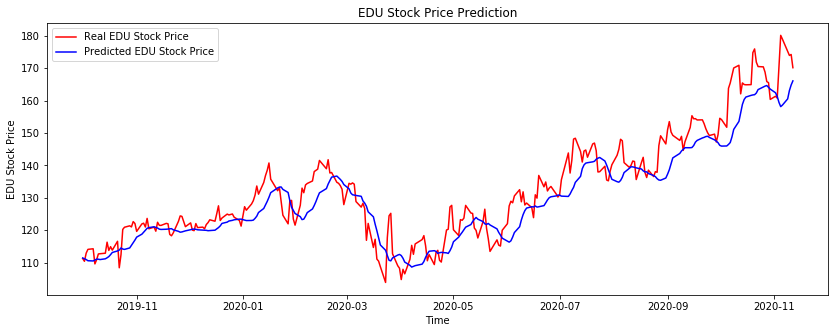

In [26]:
plt.figure(figsize=(14,5))
plt.plot(EDU_test["Date"],EDU_test["Close"], color = 'red', label = 'Real EDU Stock Price')
plt.plot(EDU_test["Date"],real_predictions, color = 'blue', label = 'Predicted EDU Stock Price')
plt.title('EDU Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('EDU Stock Price')
plt.legend()
plt.savefig('Unadjusted')

In [28]:
import datetime
adjustment = datetime.timedelta(days=7)
EDU_test['Date']= pd.to_datetime(EDU_test['Date'])
EDU_test["Adj Date"] = EDU_test["Date"]- adjustment

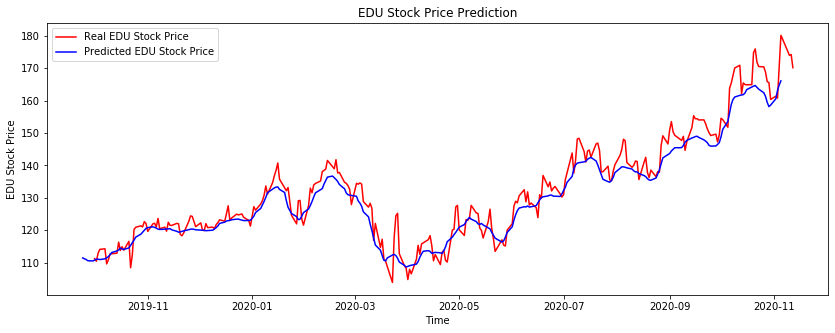

In [68]:
plt.figure(figsize=(14,5))
plt.plot(EDU_test["Date"],EDU_test["Close"], color = 'red', label = 'Real EDU Stock Price')
plt.plot(EDU_test["Adj Date"],real_predictions, color = 'blue', label = 'Predicted EDU Stock Price')
plt.title('EDU Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('EDU Stock Price')
plt.legend()
plt.savefig('Adjusted')